Importing Python libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

Reading the data

In [2]:
data = pd.read_csv("mturkfitbit_export_3.12.16-4.11.16\Fitabase Data 3.12.16-4.11.16\dailyActivity_merged.csv")


In [3]:
data.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,3/25/2016,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819
1,1503960366,3/26/2016,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154
2,1503960366,3/27/2016,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944
3,1503960366,3/28/2016,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932
4,1503960366,3/29/2016,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886


check there is null data

In [4]:
print(data.isnull().sum())

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64


So the dataset does not have any null values

look at the information about columns in the dataset

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        457 non-null    int64  
 1   ActivityDate              457 non-null    object 
 2   TotalSteps                457 non-null    int64  
 3   TotalDistance             457 non-null    float64
 4   TrackerDistance           457 non-null    float64
 5   LoggedActivitiesDistance  457 non-null    float64
 6   VeryActiveDistance        457 non-null    float64
 7   ModeratelyActiveDistance  457 non-null    float64
 8   LightActiveDistance       457 non-null    float64
 9   SedentaryActiveDistance   457 non-null    float64
 10  VeryActiveMinutes         457 non-null    int64  
 11  FairlyActiveMinutes       457 non-null    int64  
 12  LightlyActiveMinutes      457 non-null    int64  
 13  SedentaryMinutes          457 non-null    int64  
 14  Calories  

convert ActivityDate column into a datetime column

In [6]:
data["ActivityDate"] = pd.to_datetime(data["ActivityDate"], 
                                      format="%m/%d/%Y")
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        457 non-null    int64         
 1   ActivityDate              457 non-null    datetime64[ns]
 2   TotalSteps                457 non-null    int64         
 3   TotalDistance             457 non-null    float64       
 4   TrackerDistance           457 non-null    float64       
 5   LoggedActivitiesDistance  457 non-null    float64       
 6   VeryActiveDistance        457 non-null    float64       
 7   ModeratelyActiveDistance  457 non-null    float64       
 8   LightActiveDistance       457 non-null    float64       
 9   SedentaryActiveDistance   457 non-null    float64       
 10  VeryActiveMinutes         457 non-null    int64         
 11  FairlyActiveMinutes       457 non-null    int64         
 12  LightlyActiveMinutes  

In [7]:
data["ActivityDate"]

0     2016-03-25
1     2016-03-26
2     2016-03-27
3     2016-03-28
4     2016-03-29
         ...    
452   2016-04-08
453   2016-04-09
454   2016-04-10
455   2016-04-11
456   2016-04-12
Name: ActivityDate, Length: 457, dtype: datetime64[ns]

Look at all the columns; you will see information about very active, fairly active, lightly active, and sedentary minutes in the dataset. Let’s combine all these columns as total minutes before moving forward

In [8]:
data["TotalMinutes"] = data["VeryActiveMinutes"] + data["FairlyActiveMinutes"] + data["LightlyActiveMinutes"] + data["SedentaryMinutes"]
print(data["TotalMinutes"].sample(5))

210    1440
378     999
175    1440
54     1440
275     631
Name: TotalMinutes, dtype: int64


look at the descriptive statistics of the dataset


In [9]:
print(data.describe())

                 Id                   ActivityDate    TotalSteps  \
count  4.570000e+02                            457    457.000000   
mean   4.628595e+09  2016-04-04 04:40:26.258205696   6546.562363   
min    1.503960e+09            2016-03-12 00:00:00      0.000000   
25%    2.347168e+09            2016-04-02 00:00:00   1988.000000   
50%    4.057193e+09            2016-04-05 00:00:00   5986.000000   
75%    6.391747e+09            2016-04-08 00:00:00  10198.000000   
max    8.877689e+09            2016-04-12 00:00:00  28497.000000   
std    2.293781e+09                            NaN   5398.493064   

       TotalDistance  TrackerDistance  LoggedActivitiesDistance  \
count     457.000000       457.000000                457.000000   
mean        4.663523         4.609847                  0.179427   
min         0.000000         0.000000                  0.000000   
25%         1.410000         1.280000                  0.000000   
50%         4.090000         4.090000               

Let’s have a look at the relationship between calories burned and the total steps walked in a day

In [10]:

figure = px.scatter(
    data_frame=data, 
    x="Calories", 
    y="TotalSteps", 
    size="VeryActiveMinutes", 
    trendline="ols", 
    title="Relationship between Calories & Total Steps",
    color="VeryActiveMinutes"  # Color points based on 'VeryActiveMinutes'
)

figure.show()


You can see that there is a linear relationship between the total number of steps and the number of calories burned in a day

Now let’s look at the average total number of active minutes in a day

In [11]:
label = ["Very Active Minutes", "Fairly Active Minutes", 
         "Lightly Active Minutes", "Inactive Minutes"]
counts = data[["VeryActiveMinutes", "FairlyActiveMinutes", 
               "LightlyActiveMinutes", "SedentaryMinutes"]].mean()
colors = ['gold','lightgreen', "pink", "blue"]

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Total Active Minutes')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30,
                  marker=dict(colors=colors, line=dict(color='black', width=3)))
fig.show()

Observations:

1-81.3% of Total inactive minutes in a day

2-15.8% of Lightly active minutes in a day

3-On an average, only 21 minutes (1.74%) were very active

4-and 1.11% (13 minutes) of fairly active minutes in a day

We transformed the data type of the ActivityDate column to the datetime column above. Let’s use it to find the weekdays of the records and add a new column to this dataset as “Day”

In [12]:
data["Day"] = data["ActivityDate"].dt.day_name()
data["Day"].head()

0      Friday
1    Saturday
2      Sunday
3      Monday
4     Tuesday
Name: Day, dtype: object

In [13]:
data.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalMinutes,Day
0,1503960366,2016-03-25,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819,1054,Friday
1,1503960366,2016-03-26,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154,968,Saturday
2,1503960366,2016-03-27,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944,934,Sunday
3,1503960366,2016-03-28,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932,1363,Monday
4,1503960366,2016-03-29,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886,1062,Tuesday


Now let’s have a look at the very active, fairly active, and lightly active minutes on each day of the week

In [14]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=data["Day"],
    y=data["VeryActiveMinutes"],
    name='Very Active',
    marker_color='purple'
))
fig.add_trace(go.Bar(
    x=data["Day"],
    y=data["FairlyActiveMinutes"],
    name='Fairly Active',
    marker_color='green'
))
fig.add_trace(go.Bar(
    x=data["Day"],
    y=data["LightlyActiveMinutes"],
    name='Lightly Active',
    marker_color='pink'
))
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

let’s have a look at the number of inactive minutes on each day of the week

In [18]:
day = data["Day"].value_counts()
label = day.index
counts = data["SedentaryMinutes"]
colors = ['gold','lightgreen', "pink", "blue", "skyblue", "cyan", "orange"]

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Inactive Minutes Daily')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30,
                  marker=dict(colors=colors, line=dict(color='black', width=3)))
fig.show()

So Thursday is the most inactive day according to the lifestyle of all the individuals in the dataset.

 let’s have a look at the number of calories burned on each day of the week

In [19]:
calories = data["Day"].value_counts()
label = calories.index
counts = data["Calories"]
colors = ['gold','lightgreen', "pink", "blue", "skyblue", "cyan", "orange"]

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Calories Burned Daily')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30,
                  marker=dict(colors=colors, line=dict(color='black', width=3)))
fig.show()

Tuesday is, therefore, one of the most active days for all individuals in the dataset, as the highest number of calories were burned on Tuesdays.



In [28]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report
import seaborn as sns


Feature Selection and Engineering

Inputs:

1- TotalSteps

2- TotalDistance

3- VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes

4- SedentaryMinutes

Output for Regression:

Calories: The target variable to predict.


In [34]:
# Choose relevant features
features = ['TotalSteps', 'TotalDistance', 'VeryActiveMinutes',
            'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes']

X = data[features]
y_reg = data['Calories']  # Target for regression

Create Classification Labels

In [36]:
data['ActivityLevel'] = data['VeryActiveMinutes'].apply(lambda x: 'Active' if x >= 30 else 'Sedentary')
y_clf = data['ActivityLevel']  # For classification


Train-Test Split and Scaling

In [30]:
# Split for regression
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42)

# Split for classification
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X, y_clf, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_reg = scaler.fit_transform(X_train_reg)
X_test_reg = scaler.transform(X_test_reg)
X_train_clf = scaler.fit_transform(X_train_clf)
X_test_clf = scaler.transform(X_test_clf)


Calorie Prediction Model (Regression)

Trains a Random Forest Regressor with 100 trees.

Evaluates using Root Mean Squared Error (RMSE) — lower is better.



In [31]:
reg_model = RandomForestRegressor(n_estimators=100, random_state=42)
reg_model.fit(X_train_reg, y_train_reg)
y_pred_reg = reg_model.predict(X_test_reg)

# Evaluation
print("Regression RMSE:", np.sqrt(mean_squared_error(y_test_reg, y_pred_reg)))


Regression RMSE: 470.538972488613


Activity Classification Model

Trains a Random Forest Classifier to detect if a person is "Active" or "Sedentary".

Evaluates with:

Accuracy Score: % of correct predictions.

Classification Report: Precision, recall, F1-score.

In [32]:
clf_model = RandomForestClassifier(n_estimators=100, random_state=42)
clf_model.fit(X_train_clf, y_train_clf)
y_pred_clf = clf_model.predict(X_test_clf)

# Evaluation
print("Classification Accuracy:", accuracy_score(y_test_clf, y_pred_clf))
print(classification_report(y_test_clf, y_pred_clf))


Classification Accuracy: 1.0
              precision    recall  f1-score   support

      Active       1.00      1.00      1.00        29
   Sedentary       1.00      1.00      1.00        63

    accuracy                           1.00        92
   macro avg       1.00      1.00      1.00        92
weighted avg       1.00      1.00      1.00        92



Visualization 

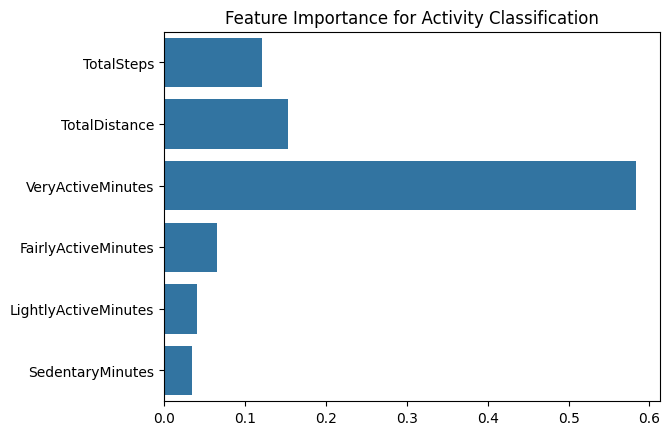

In [37]:
importances = clf_model.feature_importances_
sns.barplot(x=importances, y=features)
plt.title("Feature Importance for Activity Classification")
plt.show()
